In [22]:
import pandas as pd
import glob
import os

# Define the file paths
file_paths = [
    '/Users/hannaholivia/Downloads/COMP3522_Singapore_Private_Residential_Properties_Price_Analysis/datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928153646.csv',
    '../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928153756.csv',
    '../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928153904.csv',
    '../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928154043.csv',
    '../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928154154.csv',
    '../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928154242.csv'
]

# Read and combine all CSV files
dataframes = []
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path)
        print(f"Loaded {file_path.split('/')[-1]}: {len(df)} rows, {len(df.columns)} columns")
        dataframes.append(df)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Combine all dataframes
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"\nCombined dataset: {len(combined_df)} total rows, {len(combined_df.columns)} columns")
    
    # Check for duplicates
    duplicates = combined_df.duplicated().sum()
    print(f"Duplicate rows found: {duplicates}")
    
    if duplicates > 0:
        combined_df = combined_df.drop_duplicates()
        print(f"After removing duplicates: {len(combined_df)} rows")
    
    # Show basic info
    print(f"\nDataset Info:")
    print(f"Columns: {list(combined_df.columns)}")
    print(f"\nFirst few rows:")
    print(combined_df.head())
    
    print(f"\nData types:")
    print(combined_df.dtypes)
    
    print(f"\nMissing values:")
    print(combined_df.isnull().sum())
    
else:
    print("No files were successfully loaded.")

Error loading /Users/hannaholivia/Downloads/COMP3522_Singapore_Private_Residential_Properties_Price_Analysis/datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928153646.csv: 'utf-8' codec can't decode byte 0xc9 in position 42301: invalid continuation byte
Error loading ../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928153756.csv: 'utf-8' codec can't decode byte 0xc9 in position 220037: invalid continuation byte
Error loading ../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928153904.csv: 'utf-8' codec can't decode byte 0xc9 in position 136502: invalid continuation byte
Error loading ../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928154043.csv: 'utf-8' codec can't decode byte 0xc9 in position 144433: invalid continuation byte
Error loading ../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction20250928154154.csv: 'utf-8' codec can't decode byte 0xc

In [23]:
import pandas as pd
import glob
import os

# Find the CSV files again
patterns = [
    "**/ResidentialTransaction*.csv",
    "**/URA_Private_Property_Transaction_Data/ResidentialTransaction*.csv",
    "../../datasets/URA_Private_Property_Transaction_Data/ResidentialTransaction*.csv"
]

file_paths = []
for pattern in patterns:
    found_files = glob.glob(pattern, recursive=True)
    csv_files = [f for f in found_files if f.endswith('.csv')]
    file_paths.extend(csv_files)

file_paths = list(set(file_paths))

# Try different encodings
encodings_to_try = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252', 'utf-16']

if file_paths:
    print(f"Found {len(file_paths)} CSV files. Trying different encodings...")
    
    dataframes = []
    for file_path in file_paths:
        file_loaded = False
        
        for encoding in encodings_to_try:
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                print(f"✅ Successfully loaded {os.path.basename(file_path)} with {encoding} encoding: {len(df)} rows, {len(df.columns)} columns")
                dataframes.append(df)
                file_loaded = True
                break
            except UnicodeDecodeError as e:
                continue
            except Exception as e:
                print(f"❌ Error with {encoding} encoding for {os.path.basename(file_path)}: {e}")
                continue
        
        if not file_loaded:
            print(f"⚠️ Could not load {os.path.basename(file_path)} with any encoding")
    
    # Combine all dataframes
    if dataframes:
        print(f"\n🎉 Successfully loaded {len(dataframes)} out of {len(file_paths)} files")
        
        # Check if all dataframes have the same columns
        column_sets = [set(df.columns) for df in dataframes]
        if len(set(tuple(sorted(cols)) for cols in column_sets)) == 1:
            print("✅ All files have the same column structure")
        else:
            print("⚠️ Files have different column structures:")
            for i, df in enumerate(dataframes):
                print(f"  File {i+1}: {list(df.columns)}")
        
        combined_df = pd.concat(dataframes, ignore_index=True)
        print(f"\nCombined dataset: {len(combined_df)} total rows, {len(combined_df.columns)} columns")
        
        # Check for duplicates
        duplicates = combined_df.duplicated().sum()
        print(f"Duplicate rows found: {duplicates}")
        
        if duplicates > 0:
            combined_df = combined_df.drop_duplicates()
            print(f"After removing duplicates: {len(combined_df)} rows")
        
        # Show basic info
        print(f"\nColumns: {list(combined_df.columns)}")
        print(f"\nFirst few rows:")
        print(combined_df.head())
        
        print(f"\nData types:")
        print(combined_df.dtypes)
        
        print(f"\nBasic statistics:")
        print(combined_df.describe(include='all'))
        
    else:
        print("❌ No files were successfully loaded with any encoding.")
        
        # As a last resort, try reading with error handling
        print("\nTrying to read with error handling...")
        for file_path in file_paths:
            try:
                df = pd.read_csv(file_path, encoding='utf-8', errors='ignore')
                print(f"Loaded {os.path.basename(file_path)} with error handling: {len(df)} rows")
                print(df.head(2))
                break
            except Exception as e:
                print(f"Still failed: {e}")
else:
    print("No CSV files found.")

Found 6 CSV files. Trying different encodings...
✅ Successfully loaded ResidentialTransaction20250928153646.csv with latin1 encoding: 10000 rows, 17 columns
✅ Successfully loaded ResidentialTransaction20250928154154.csv with latin1 encoding: 10000 rows, 17 columns
✅ Successfully loaded ResidentialTransaction20250928154242.csv with latin1 encoding: 4990 rows, 17 columns
✅ Successfully loaded ResidentialTransaction20250928153756.csv with latin1 encoding: 10000 rows, 17 columns
✅ Successfully loaded ResidentialTransaction20250928154043.csv with latin1 encoding: 10000 rows, 17 columns
✅ Successfully loaded ResidentialTransaction20250928153904.csv with latin1 encoding: 10000 rows, 17 columns

🎉 Successfully loaded 6 out of 6 files
✅ All files have the same column structure

Combined dataset: 54990 total rows, 17 columns
Duplicate rows found: 2476
After removing duplicates: 52514 rows

Columns: ['Project Name', 'Transacted Price ($)', 'Area (SQFT)', 'Unit Price ($ PSF)', 'Sale Date', 'Street

In [24]:
combined_df

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
0,GRAND DUNMAN,"4,478,000","1,786.82","2,506",Sep-25,DUNMAN ROAD,New Sale,Strata,166.0,"26,976",-,Apartment,1,99 yrs lease commencing from 2022,15,Rest of Central Region,01 to 05
1,UPPERHOUSE AT ORCHARD BOULEVARD,"1,495,000",473.62,"3,157",Sep-25,ORCHARD BOULEVARD,New Sale,Strata,44.0,"33,977",-,Apartment,1,99 yrs lease commencing from 2024,10,Core Central Region,11 to 15
2,UPPERHOUSE AT ORCHARD BOULEVARD,"2,402,000",699.66,"3,433",Sep-25,ORCHARD BOULEVARD,New Sale,Strata,65.0,"36,954",-,Apartment,1,99 yrs lease commencing from 2024,10,Core Central Region,21 to 25
3,CANBERRA CRESCENT RESIDENCES,"1,336,200",667.37,"2,002",Sep-25,CANBERRA CRESCENT,New Sale,Strata,62.0,"21,552",-,Apartment,1,99 yrs lease commencing from 2024,27,Outside Central Region,01 to 05
4,THE ROBERTSON OPUS,"2,378,000",688.9,"3,452",Sep-25,UNITY STREET,New Sale,Strata,64.0,"37,156",-,Apartment,1,999 yrs lease commencing from 1841,9,Core Central Region,06 to 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54985,CHERRY GARDENS,"1,425,000","1,097.93","1,298",Jun-24,LORONG LEW LIAN,Resale,Strata,102.0,"13,971",-,Apartment,1,99 yrs lease commencing from 1996,19,Outside Central Region,01 to 05
54986,CUSCADEN RESERVE,"3,499,000","1,162.51","3,010",Jun-24,CUSCADEN ROAD,Resale,Strata,108.0,"32,398",-,Condominium,1,99 yrs lease commencing from 2018,10,Core Central Region,01 to 05
54987,HIGHLINE RESIDENCES,"2,700,000","1,151.75","2,344",Jun-24,KIM TIAN ROAD,Resale,Strata,107.0,"25,234",-,Condominium,1,99 yrs lease commencing from 2013,3,Rest of Central Region,11 to 15
54988,HELIOS RESIDENCES,"4,250,000","1,915.99","2,218",Jun-24,CAIRNHILL CIRCLE,Resale,Strata,178.0,"23,876",-,Apartment,1,Freehold,9,Core Central Region,01 to 05


In [25]:
# First, let's clean and prepare the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe is called 'combined_df' from previous step
# Let's clean the data first

print("=== DATA CLEANING & PREPARATION ===")

# Clean price columns (remove commas)
price_columns = ['Transacted Price ($)', 'Unit Price ($ PSF)', 'Unit Price ($ PSM)', 'Nett Price($)']
for col in price_columns:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].astype(str).str.replace(',', '').str.replace('-', '0')
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Convert Sale Date to datetime
combined_df['Sale Date'] = pd.to_datetime(combined_df['Sale Date'], format='%b-%y', errors='coerce')

# Clean area columns
combined_df['Area (SQFT)'] = pd.to_numeric(combined_df['Area (SQFT)'], errors='coerce')
combined_df['Area (SQM)'] = pd.to_numeric(combined_df['Area (SQM)'], errors='coerce')

print(f"Dataset shape: {combined_df.shape}")
print(f"Date range: {combined_df['Sale Date'].min()} to {combined_df['Sale Date'].max()}")

# 1. MARKET ANALYSIS
print("\n=== MARKET ANALYSIS ===")
print("Market Segment Distribution:")
market_dist = combined_df['Market Segment'].value_counts()
print(market_dist)

print(f"\nTotal Transaction Value: ${combined_df['Transacted Price ($)'].sum():,.0f}")
print(f"Average Transaction Value: ${combined_df['Transacted Price ($)'].mean():,.0f}")
print(f"Median Transaction Value: ${combined_df['Transacted Price ($)'].median():,.0f}")

# 2. PRICE ANALYSIS BY REGION
print("\n=== PRICE ANALYSIS BY REGION ===")
region_stats = combined_df.groupby('Market Segment')['Transacted Price ($)'].agg(['count', 'mean', 'median', 'std']).round(0)
print(region_stats)

print("\nUnit Price PSF by Region:")
psf_stats = combined_df.groupby('Market Segment')['Unit Price ($ PSF)'].agg(['mean', 'median', 'min', 'max']).round(0)
print(psf_stats)

# 3. PROPERTY TYPE ANALYSIS
print("\n=== PROPERTY TYPE ANALYSIS ===")
property_dist = combined_df['Property Type'].value_counts()
print("Property Type Distribution:")
print(property_dist)

if len(property_dist) > 1:
    property_prices = combined_df.groupby('Property Type')['Transacted Price ($)'].agg(['count', 'mean', 'median']).round(0)
    print("\nPrice by Property Type:")
    print(property_prices)

# 4. TENURE ANALYSIS
print("\n=== TENURE ANALYSIS ===")
tenure_dist = combined_df['Tenure'].value_counts()
print("Tenure Distribution:")
print(tenure_dist)

tenure_prices = combined_df.groupby('Tenure')['Unit Price ($ PSF)'].agg(['count', 'mean', 'median']).round(0)
print("\nUnit Price PSF by Tenure:")
print(tenure_prices)

# 5. POSTAL DISTRICT ANALYSIS
print("\n=== POSTAL DISTRICT ANALYSIS ===")
district_stats = combined_df.groupby('Postal District').agg({
    'Transacted Price ($)': ['count', 'mean', 'median'],
    'Unit Price ($ PSF)': 'mean',
    'Area (SQFT)': 'mean'
}).round(0)

print("Top 10 Most Active Districts:")
print(district_stats.sort_values(('Transacted Price ($)', 'count'), ascending=False).head(10))

print("\nTop 10 Most Expensive Districts (by PSF):")
expensive_districts = district_stats.sort_values(('Unit Price ($ PSF)', 'mean'), ascending=False).head(10)
print(expensive_districts)

# 6. SIZE ANALYSIS
print("\n=== PROPERTY SIZE ANALYSIS ===")
print(f"Average Unit Size: {combined_df['Area (SQFT)'].mean():.0f} sqft")
print(f"Size Range: {combined_df['Area (SQFT)'].min():.0f} - {combined_df['Area (SQFT)'].max():.0f} sqft")

# Create size categories
combined_df['Size_Category'] = pd.cut(combined_df['Area (SQFT)'], 
                                    bins=[0, 500, 750, 1000, 1500, float('inf')], 
                                    labels=['Compact (<500)', 'Small (500-750)', 'Medium (750-1000)', 
                                           'Large (1000-1500)', 'Luxury (>1500)'])

size_analysis = combined_df.groupby('Size_Category').agg({
    'Transacted Price ($)': ['count', 'mean', 'median'],
    'Unit Price ($ PSF)': 'mean'
}).round(0)
print("\nPrice by Size Category:")
print(size_analysis)

# 7. TEMPORAL ANALYSIS
print("\n=== TEMPORAL ANALYSIS ===")
if combined_df['Sale Date'].notna().sum() > 0:
    monthly_sales = combined_df.groupby(combined_df['Sale Date'].dt.to_period('M')).agg({
        'Transacted Price ($)': ['count', 'sum', 'mean'],
        'Unit Price ($ PSF)': 'mean'
    }).round(0)
    print("Recent Monthly Sales Activity:")
    print(monthly_sales.tail())

# 8. FLOOR LEVEL ANALYSIS
print("\n=== FLOOR LEVEL ANALYSIS ===")
floor_dist = combined_df['Floor Level'].value_counts()
print("Floor Level Distribution:")
print(floor_dist)

if len(floor_dist) > 1:
    floor_prices = combined_df.groupby('Floor Level')['Unit Price ($ PSF)'].agg(['count', 'mean', 'median']).round(0)
    print("\nUnit Price PSF by Floor Level:")
    print(floor_prices.sort_values('mean', ascending=False))

# 9. TOP PROJECTS ANALYSIS
print("\n=== TOP PROJECTS ANALYSIS ===")
project_stats = combined_df.groupby('Project Name').agg({
    'Transacted Price ($)': ['count', 'sum', 'mean'],
    'Unit Price ($ PSF)': 'mean',
    'Area (SQFT)': 'mean'
}).round(0)

print("Top 10 Projects by Transaction Volume:")
print(project_stats.sort_values(('Transacted Price ($)', 'count'), ascending=False).head(10))

print("\nTop 10 Most Expensive Projects (by PSF):")
print(project_stats.sort_values(('Unit Price ($ PSF)', 'mean'), ascending=False).head(10))

# 10. CORRELATIONS
print("\n=== CORRELATIONS ===")
numeric_cols = ['Transacted Price ($)', 'Area (SQFT)', 'Unit Price ($ PSF)', 'Area (SQM)', 'Unit Price ($ PSM)']
correlation_matrix = combined_df[numeric_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

=== DATA CLEANING & PREPARATION ===
Dataset shape: (52514, 17)
Date range: 2023-01-01 00:00:00 to 2025-09-01 00:00:00

=== MARKET ANALYSIS ===
Market Segment Distribution:
Market Segment
Outside Central Region    25290
Rest of Central Region    18602
Core Central Region        8622
Name: count, dtype: int64

Total Transaction Value: $106,212,478,003
Average Transaction Value: $2,022,555
Median Transaction Value: $1,760,000

=== PRICE ANALYSIS BY REGION ===
                        count       mean     median        std
Market Segment                                                
Core Central Region      8622  2969450.0  2404860.0  2409490.0
Outside Central Region  25290  1634112.0  1531000.0   946276.0
Rest of Central Region  18602  2111772.0  1897000.0  3041183.0

Unit Price PSF by Region:
                          mean  median  min   max
Market Segment                                   
Core Central Region     2477.0  2382.0  938  6593
Outside Central Region  1716.0  1675.0  286  28

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming your combined dataframe is ready
print("=== PRELIMINARY EDA FOR SINGAPORE PROPERTY PRICE ANALYSIS ===")
print(f"Dataset: {combined_df.shape[0]} transactions, {combined_df.shape[1]} features")
print(f"Time period: {combined_df['Sale Date'].min()} to {combined_df['Sale Date'].max()}")

# 1. DATA QUALITY ASSESSMENT
print("\n=== 1. DATA QUALITY ASSESSMENT ===")
print("Missing values by column:")
missing_data = combined_df.isnull().sum()
missing_pct = (missing_data / len(combined_df)) * 100
quality_df = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_pct})
print(quality_df[quality_df['Missing Count'] > 0])

print(f"\nKey statistics:")
print(f"- Complete records: {combined_df.dropna().shape[0]} ({(combined_df.dropna().shape[0]/len(combined_df))*100:.1f}%)")
print(f"- Price data completeness: {combined_df['Transacted Price ($)'].notna().sum()} records")
print(f"- Area data completeness: {combined_df['Area (SQFT)'].notna().sum()} records")

# 2. MARKET SEGMENTATION OVERVIEW
print("\n=== 2. MARKET SEGMENTATION OVERVIEW ===")
market_overview = combined_df.groupby('Market Segment').agg({
    'Transacted Price ($)': ['count', 'mean', 'median', 'std'],
    'Unit Price ($ PSF)': ['mean', 'median'],
    'Area (SQFT)': 'mean'
}).round(0)

print("Market Segment Summary:")
print(market_overview)

# Price distribution by market segment
print(f"\nPrice ranges by market segment:")
for segment in combined_df['Market Segment'].unique():
    segment_data = combined_df[combined_df['Market Segment'] == segment]['Transacted Price ($)']
    print(f"{segment}:")
    print(f"  Range: ${segment_data.min():,.0f} - ${segment_data.max():,.0f}")
    print(f"  IQR: ${segment_data.quantile(0.25):,.0f} - ${segment_data.quantile(0.75):,.0f}")

# 3. DISTRICT-LEVEL ANALYSIS
print("\n=== 3. DISTRICT-LEVEL ANALYSIS ===")
district_analysis = combined_df.groupby('Postal District').agg({
    'Transacted Price ($)': ['count', 'mean', 'median'],
    'Unit Price ($ PSF)': ['mean', 'std'],
    'Area (SQFT)': 'mean',
    'Market Segment': lambda x: x.mode()[0] if not x.empty else 'Unknown'
}).round(0)

print("Most active districts (by transaction volume):")
active_districts = district_analysis.sort_values(('Transacted Price ($)', 'count'), ascending=False).head(10)
print(active_districts)

print("\nMost expensive districts (by PSF):")
expensive_districts = district_analysis.sort_values(('Unit Price ($ PSF)', 'mean'), ascending=False).head(10)
print(expensive_districts)

print("\nMost affordable districts (by PSF):")
affordable_districts = district_analysis.sort_values(('Unit Price ($ PSF)', 'mean'), ascending=True).head(10)
print(affordable_districts)

# 4. PROPERTY SIZE SEGMENTATION (for demographic targeting)
print("\n=== 4. PROPERTY SIZE SEGMENTATION ===")
# Create size categories relevant to different demographics
combined_df['Size_Segment'] = pd.cut(combined_df['Area (SQFT)'], 
                                   bins=[0, 500, 750, 1000, 1500, float('inf')], 
                                   labels=['Studio/1BR (<500)', 'Compact 2BR (500-750)', 
                                          'Standard 3BR (750-1000)', 'Large 4BR (1000-1500)', 
                                          'Luxury 5BR+ (>1500)'])

size_demographics = {
    'Studio/1BR (<500)': 'Young Adults/Singles',
    'Compact 2BR (500-750)': 'Young Couples/Small Families', 
    'Standard 3BR (750-1000)': 'Growing Families',
    'Large 4BR (1000-1500)': 'Established Families',
    'Luxury 5BR+ (>1500)': 'Affluent Families/Retirees'
}

size_analysis = combined_df.groupby('Size_Segment').agg({
    'Transacted Price ($)': ['count', 'mean', 'median', 'std'],
    'Unit Price ($ PSF)': ['mean', 'median'],
    'Market Segment': lambda x: x.value_counts().index[0] if not x.empty else 'Unknown'
}).round(0)

print("Property size analysis (mapped to demographics):")
for idx, row in size_analysis.iterrows():
    target_demo = size_demographics.get(idx, 'Unknown')
    print(f"\n{idx} - Target: {target_demo}")
    print(f"  Transactions: {row[('Transacted Price ($)', 'count')]:,.0f}")
    print(f"  Avg Price: ${row[('Transacted Price ($)', 'mean')]:,.0f}")
    print(f"  Avg PSF: ${row[('Unit Price ($ PSF)', 'mean')]:,.0f}")
    print(f"  Main Region: {row[('Market Segment', '<lambda>')]}")

# 5. AFFORDABILITY ANALYSIS
print("\n=== 5. AFFORDABILITY ANALYSIS ===")
# Define affordability brackets (rough Singapore context)
affordability_brackets = {
    'Budget (<$1M)': combined_df[combined_df['Transacted Price ($)'] < 1000000],
    'Mid-range ($1M-$2M)': combined_df[(combined_df['Transacted Price ($)'] >= 1000000) & 
                                      (combined_df['Transacted Price ($)'] < 2000000)],
    'Premium ($2M-$4M)': combined_df[(combined_df['Transacted Price ($)'] >= 2000000) & 
                                    (combined_df['Transacted Price ($)'] < 4000000)],
    'Luxury ($4M+)': combined_df[combined_df['Transacted Price ($)'] >= 4000000]
}

print("Affordability distribution:")
for bracket, data in affordability_brackets.items():
    if len(data) > 0:
        print(f"{bracket}: {len(data)} transactions ({len(data)/len(combined_df)*100:.1f}%)")
        print(f"  Avg Size: {data['Area (SQFT)'].mean():.0f} sqft")
        print(f"  Avg PSF: ${data['Unit Price ($ PSF)'].mean():.0f}")
        print(f"  Top Districts: {data['Postal District'].value_counts().head(3).to_dict()}")

# 6. TENURE ANALYSIS
print("\n=== 6. TENURE ANALYSIS ===")
tenure_impact = combined_df.groupby('Tenure').agg({
    'Transacted Price ($)': ['count', 'mean'],
    'Unit Price ($ PSF)': ['mean', 'std'],
    'Area (SQFT)': 'mean'
}).round(0)

print("Tenure impact on pricing:")
print(tenure_impact)

# 7. TEMPORAL TRENDS (2023-2025)
print("\n=== 7. TEMPORAL TRENDS ===")
if combined_df['Sale Date'].notna().sum() > 0:
    combined_df['Year_Month'] = combined_df['Sale Date'].dt.to_period('M')
    
    monthly_trends = combined_df.groupby('Year_Month').agg({
        'Transacted Price ($)': ['count', 'mean', 'median'],
        'Unit Price ($ PSF)': ['mean', 'std']
    }).round(0)
    
    print("Recent monthly trends:")
    print(monthly_trends.tail(12))
    
    # Calculate month-over-month changes
    monthly_trends['Price_Change'] = monthly_trends[('Transacted Price ($)', 'mean')].pct_change() * 100
    monthly_trends['PSF_Change'] = monthly_trends[('Unit Price ($ PSF)', 'mean')].pct_change() * 100
    
    print(f"\nRecent price momentum:")
    recent_trends = monthly_trends[['Price_Change', 'PSF_Change']].tail(6)
    print(recent_trends.round(2))

# 8. OUTLIER DETECTION
print("\n=== 8. OUTLIER DETECTION ===")
# Price outliers
Q1_price = combined_df['Transacted Price ($)'].quantile(0.25)
Q3_price = combined_df['Transacted Price ($)'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_outliers = combined_df[
    (combined_df['Transacted Price ($)'] < (Q1_price - 1.5 * IQR_price)) |
    (combined_df['Transacted Price ($)'] > (Q3_price + 1.5 * IQR_price))
]

print(f"Price outliers detected: {len(price_outliers)} transactions")
if len(price_outliers) > 0:
    print("Extreme high-value transactions:")
    high_value = price_outliers.nlargest(5, 'Transacted Price ($)')
    print(high_value[['Project Name', 'Transacted Price ($)', 'Area (SQFT)', 'Unit Price ($ PSF)', 'Postal District']])

# 9. CORRELATION ANALYSIS
print("\n=== 9. CORRELATION ANALYSIS ===")
numeric_columns = ['Transacted Price ($)', 'Area (SQFT)', 'Unit Price ($ PSF)', 'Area (SQM)', 'Unit Price ($ PSM)']
correlation_matrix = combined_df[numeric_columns].corr()

print("Key correlations:")
print(f"Price vs Area: {correlation_matrix.loc['Transacted Price ($)', 'Area (SQFT)']:.3f}")
print(f"Price vs PSF: {correlation_matrix.loc['Transacted Price ($)', 'Unit Price ($ PSF)']:.3f}")
print(f"Area vs PSF: {correlation_matrix.loc['Area (SQFT)', 'Unit Price ($ PSF)']:.3f}")

# 10. KEY INSIGHTS SUMMARY
print("\n=== 10. KEY PRELIMINARY INSIGHTS ===")
print("📊 MARKET STRUCTURE:")
print(f"- {combined_df['Market Segment'].value_counts().index[0]} dominates with {combined_df['Market Segment'].value_counts().iloc[0]} transactions")
print(f"- Price range: ${combined_df['Transacted Price ($)'].min():,.0f} - ${combined_df['Transacted Price ($)'].max():,.0f}")
print(f"- Most active district: D{combined_df['Postal District'].value_counts().index[0]} ({combined_df['Postal District'].value_counts().iloc[0]} transactions)")

print(f"\n🏠 PROPERTY CHARACTERISTICS:")
print(f"- Average unit size: {combined_df['Area (SQFT)'].mean():.0f} sqft")
print(f"- Average price per sqft: ${combined_df['Unit Price ($ PSF)'].mean():.0f}")
print(f"- Most common property type: {combined_df['Property Type'].value_counts().index[0]}")

print(f"\n👥 DEMOGRAPHIC SEGMENTS:")
for segment, demo in size_demographics.items():
    if segment in combined_df['Size_Segment'].value_counts().index:
        count = combined_df['Size_Segment'].value_counts()[segment]
        print(f"- {demo}: {count} transactions ({count/len(combined_df)*100:.1f}%)")

=== PRELIMINARY EDA FOR SINGAPORE PROPERTY PRICE ANALYSIS ===
Dataset: 52514 transactions, 18 features
Time period: 2023-01-01 00:00:00 to 2025-09-01 00:00:00

=== 1. DATA QUALITY ASSESSMENT ===
Missing values by column:
               Missing Count  Missing %
Area (SQFT)            23377  44.515748
Area (SQM)                 3   0.005713
Size_Category          23377  44.515748

Key statistics:
- Complete records: 29137 (55.5%)
- Price data completeness: 52514 records
- Area data completeness: 29137 records

=== 2. MARKET SEGMENTATION OVERVIEW ===
Market Segment Summary:
                       Transacted Price ($)                                   \
                                      count       mean     median        std   
Market Segment                                                                 
Core Central Region                    8622  2969450.0  2404860.0  2409490.0   
Outside Central Region                25290  1634112.0  1531000.0   946276.0   
Rest of Central Region

Creating DISTRICT-FOCUSED visualizations for Singapore Property Analysis...


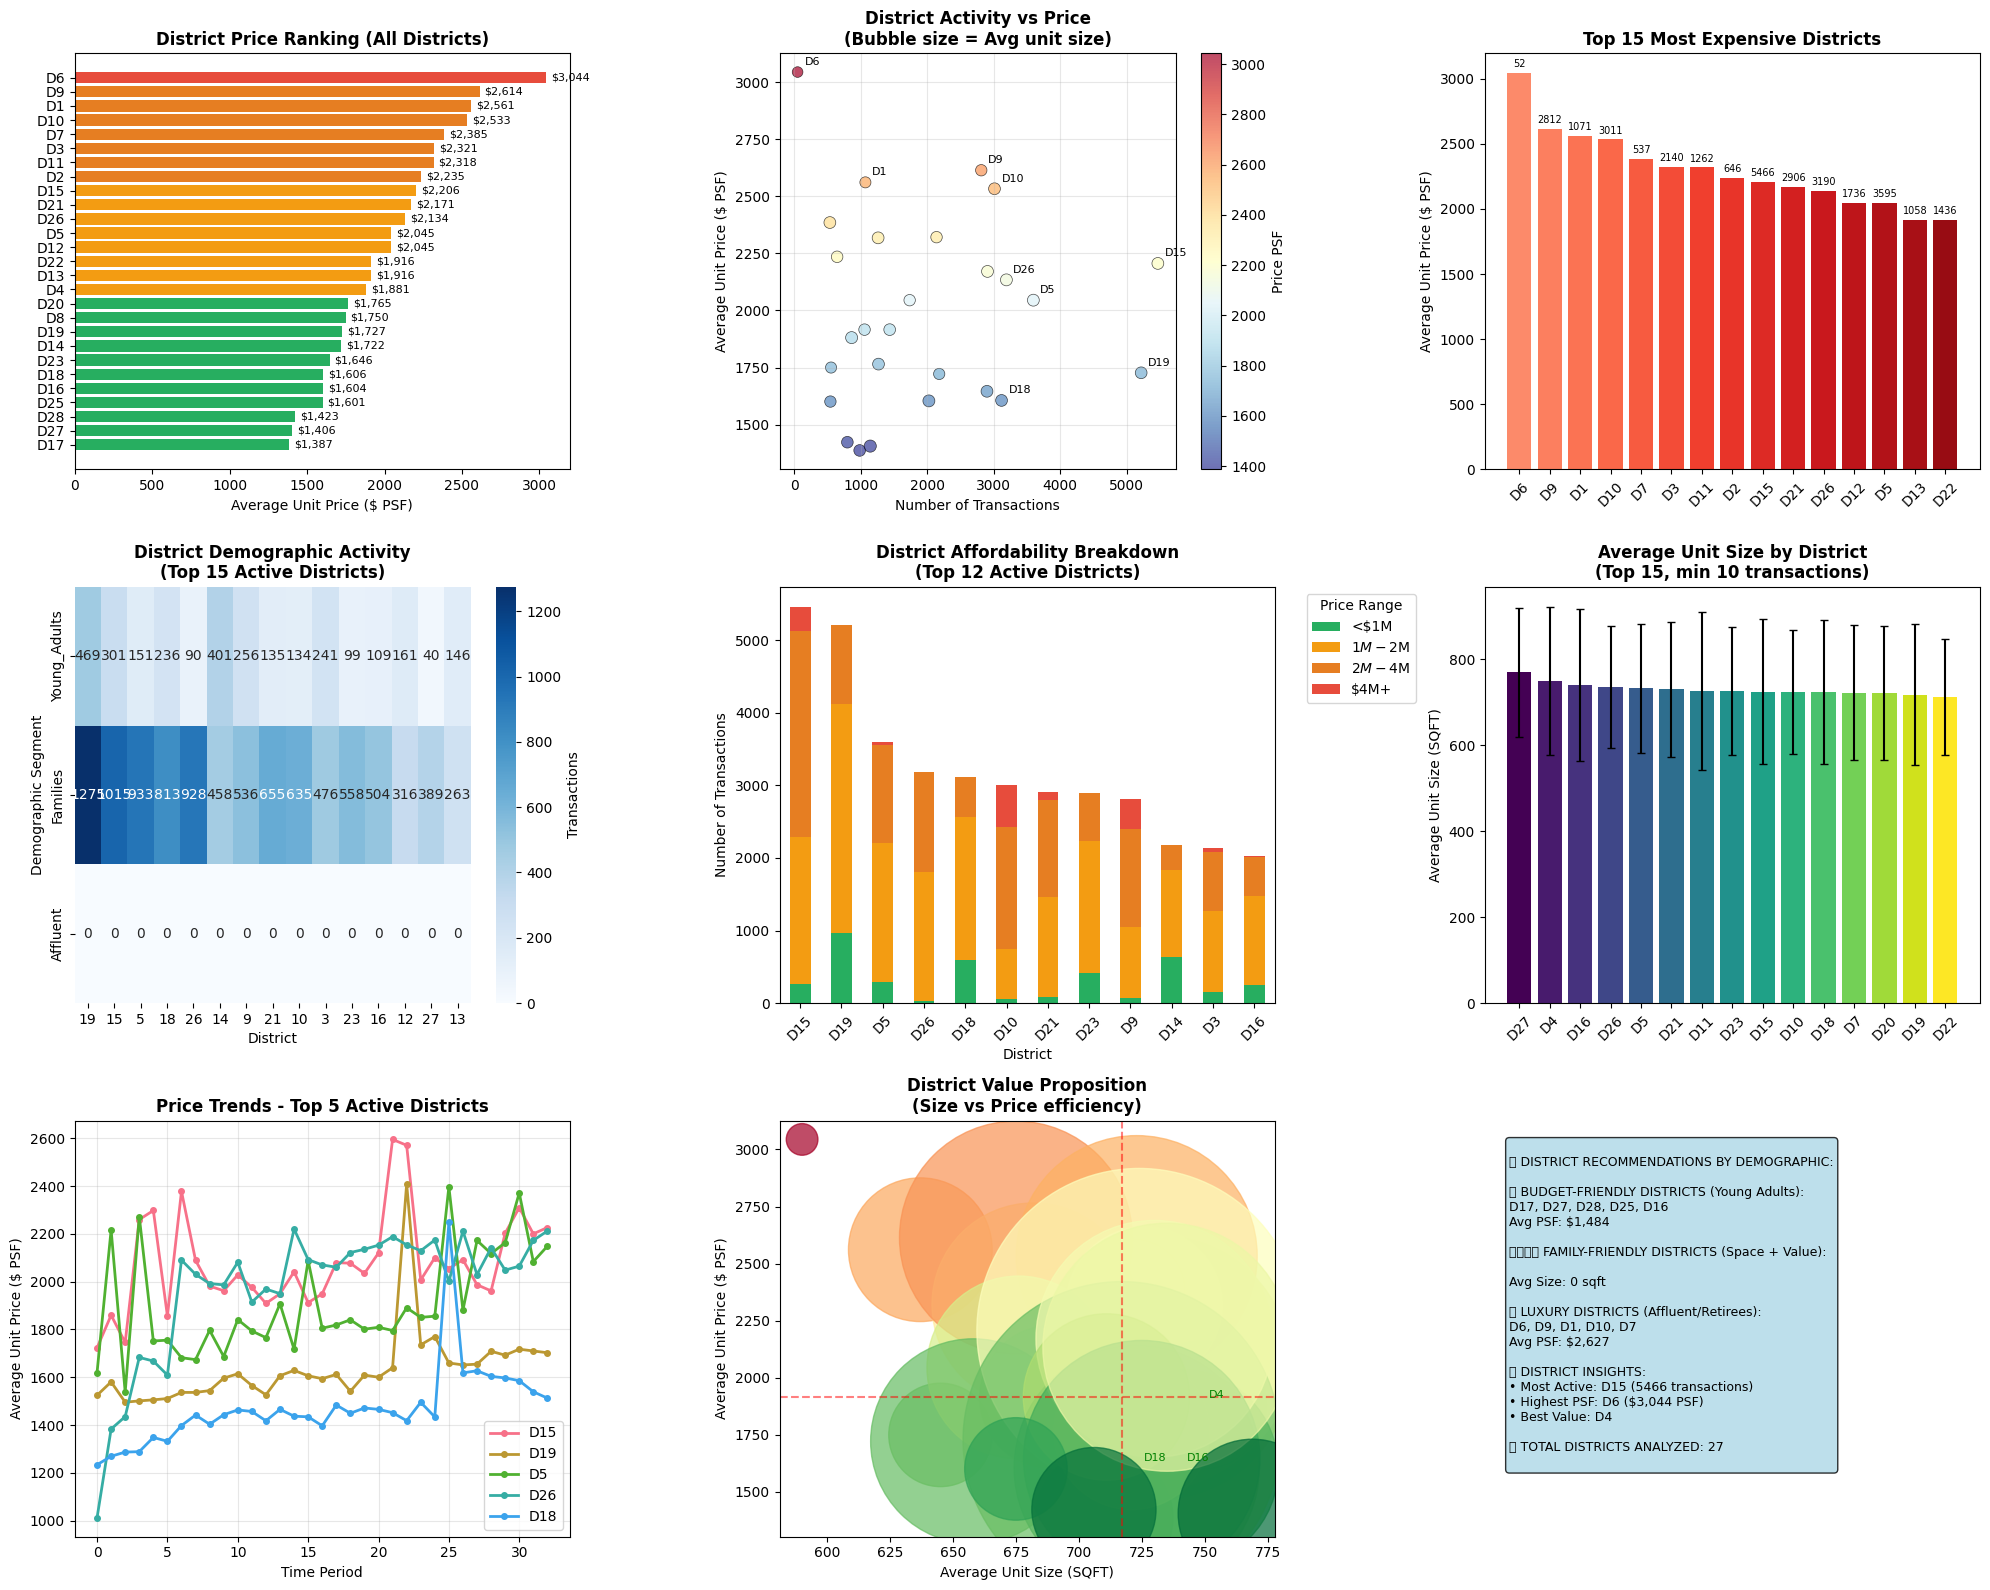

✅ DISTRICT-FOCUSED visualization dashboard completed!

🏘️ Analysis covers 27 districts with detailed breakdowns for:
- District price rankings and affordability
- Demographic suitability by district
- Size preferences and value propositions
- Activity levels and market trends
- Targeted recommendations for each buyer group


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Creating DISTRICT-FOCUSED visualizations for Singapore Property Analysis...")

# Create district-focused visualization dashboard
fig = plt.figure(figsize=(20, 16))

# 1. DISTRICT PRICE RANKING (Main visualization)
ax1 = plt.subplot(3, 3, 1)
district_summary = combined_df.groupby('Postal District').agg({
    'Unit Price ($ PSF)': 'mean',
    'Transacted Price ($)': ['count', 'median'],
    'Area (SQFT)': 'mean'
}).round(0)

district_summary.columns = ['Avg_PSF', 'Transaction_Count', 'Median_Price', 'Avg_Size']
district_summary = district_summary.sort_values('Avg_PSF', ascending=True)

# Color code by price tier
district_summary['Price_Tier'] = pd.cut(district_summary['Avg_PSF'], 
                                      bins=4, labels=['Budget', 'Mid-tier', 'Premium', 'Luxury'])
color_map = {'Budget': '#27AE60', 'Mid-tier': '#F39C12', 'Premium': '#E67E22', 'Luxury': '#E74C3C'}
colors = [color_map[tier] for tier in district_summary['Price_Tier']]

bars = ax1.barh(range(len(district_summary)), district_summary['Avg_PSF'], color=colors)
ax1.set_yticks(range(len(district_summary)))
ax1.set_yticklabels([f'D{d}' for d in district_summary.index])
ax1.set_xlabel('Average Unit Price ($ PSF)')
ax1.set_title('District Price Ranking (All Districts)', fontweight='bold')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, district_summary['Avg_PSF'])):
    ax1.text(bar.get_width() + max(district_summary['Avg_PSF'])*0.01, bar.get_y() + bar.get_height()/2,
             f'${value:,.0f}', va='center', ha='left', fontsize=8)

# 2. DISTRICT ACTIVITY vs PRICE SCATTER
ax2 = plt.subplot(3, 3, 2)
scatter = ax2.scatter(district_summary['Transaction_Count'], district_summary['Avg_PSF'],
                     s=district_summary['Avg_Size']/10, alpha=0.7, 
                     c=district_summary['Avg_PSF'], cmap='RdYlBu_r', edgecolors='black', linewidth=0.5)

# Label key districts
for idx, row in district_summary.iterrows():
    if row['Transaction_Count'] > district_summary['Transaction_Count'].quantile(0.8) or \
       row['Avg_PSF'] > district_summary['Avg_PSF'].quantile(0.9):
        ax2.annotate(f'D{idx}', (row['Transaction_Count'], row['Avg_PSF']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('Average Unit Price ($ PSF)')
ax2.set_title('District Activity vs Price\n(Bubble size = Avg unit size)', fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Price PSF')

# 3. TOP 15 MOST EXPENSIVE DISTRICTS
ax3 = plt.subplot(3, 3, 3)
top_expensive = district_summary.nlargest(15, 'Avg_PSF')
bars = ax3.bar(range(len(top_expensive)), top_expensive['Avg_PSF'], 
               color=plt.cm.Reds(np.linspace(0.4, 0.9, len(top_expensive))))
ax3.set_xticks(range(len(top_expensive)))
ax3.set_xticklabels([f'D{d}' for d in top_expensive.index], rotation=45)
ax3.set_ylabel('Average Unit Price ($ PSF)')
ax3.set_title('Top 15 Most Expensive Districts', fontweight='bold')

# Add transaction count labels
for i, (bar, district) in enumerate(zip(bars, top_expensive.index)):
    count = top_expensive.loc[district, 'Transaction_Count']
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(top_expensive['Avg_PSF'])*0.01,
             f'{count}', ha='center', va='bottom', fontsize=7)

# 4. DISTRICT DEMOGRAPHIC SUITABILITY MATRIX
ax4 = plt.subplot(3, 3, 4)

# Create demographic suitability scores for each district
district_demographics = []
for district in combined_df['Postal District'].unique():
    district_data = combined_df[combined_df['Postal District'] == district]
    
    # Calculate suitability scores
    young_adult_score = len(district_data[district_data['Size_Segment'] == 'Studio/1BR (<500)'])
    family_score = len(district_data[district_data['Size_Segment'].isin(['Standard 3BR (750-1000)', 'Large 4BR (1000-1500)'])])
    affluent_score = len(district_data[district_data['Size_Segment'] == 'Luxury 5BR+ (>1500)'])
    
    district_demographics.append({
        'District': district,
        'Young_Adults': young_adult_score,
        'Families': family_score,
        'Affluent': affluent_score
    })

demo_df = pd.DataFrame(district_demographics)
demo_df = demo_df.set_index('District')

# Get top 15 districts by total activity
top_districts = demo_df.sum(axis=1).nlargest(15).index
demo_matrix = demo_df.loc[top_districts]

sns.heatmap(demo_matrix.T, annot=True, fmt='d', cmap='Blues', ax=ax4, cbar_kws={'label': 'Transactions'})
ax4.set_title('District Demographic Activity\n(Top 15 Active Districts)', fontweight='bold')
ax4.set_xlabel('District')
ax4.set_ylabel('Demographic Segment')

# 5. DISTRICT AFFORDABILITY BREAKDOWN
ax5 = plt.subplot(3, 3, 5)
affordability_by_district = []

for district in combined_df['Postal District'].value_counts().head(12).index:
    district_data = combined_df[combined_df['Postal District'] == district]
    
    budget_count = len(district_data[district_data['Transacted Price ($)'] < 1000000])
    mid_count = len(district_data[(district_data['Transacted Price ($)'] >= 1000000) & 
                                 (district_data['Transacted Price ($)'] < 2000000)])
    premium_count = len(district_data[(district_data['Transacted Price ($)'] >= 2000000) & 
                                     (district_data['Transacted Price ($)'] < 4000000)])
    luxury_count = len(district_data[district_data['Transacted Price ($)'] >= 4000000])
    
    affordability_by_district.append([budget_count, mid_count, premium_count, luxury_count])

affordability_df = pd.DataFrame(affordability_by_district, 
                               columns=['<$1M', '$1M-$2M', '$2M-$4M', '$4M+'],
                               index=[f'D{d}' for d in combined_df['Postal District'].value_counts().head(12).index])

affordability_df.plot(kind='bar', stacked=True, ax=ax5, 
                     color=['#27AE60', '#F39C12', '#E67E22', '#E74C3C'])
ax5.set_xlabel('District')
ax5.set_ylabel('Number of Transactions')
ax5.set_title('District Affordability Breakdown\n(Top 12 Active Districts)', fontweight='bold')
ax5.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.tick_params(axis='x', rotation=45)

# 6. DISTRICT SIZE PREFERENCES
ax6 = plt.subplot(3, 3, 6)
size_by_district = combined_df.groupby('Postal District')['Area (SQFT)'].agg(['mean', 'std', 'count']).round(0)
size_by_district = size_by_district[size_by_district['count'] >= 10]  # Minimum 10 transactions
size_by_district = size_by_district.sort_values('mean', ascending=False).head(15)

bars = ax6.bar(range(len(size_by_district)), size_by_district['mean'], 
               yerr=size_by_district['std'], capsize=3,
               color=plt.cm.viridis(np.linspace(0, 1, len(size_by_district))))
ax6.set_xticks(range(len(size_by_district)))
ax6.set_xticklabels([f'D{d}' for d in size_by_district.index], rotation=45)
ax6.set_ylabel('Average Unit Size (SQFT)')
ax6.set_title('Average Unit Size by District\n(Top 15, min 10 transactions)', fontweight='bold')

# 7. DISTRICT PRICE TRENDS (if temporal data available)
ax7 = plt.subplot(3, 3, 7)
if combined_df['Sale Date'].notna().sum() > 0:
    # Get top 5 most active districts for trend analysis
    top_5_districts = combined_df['Postal District'].value_counts().head(5).index
    
    for district in top_5_districts:
        district_data = combined_df[combined_df['Postal District'] == district]
        monthly_trends = district_data.groupby(district_data['Sale Date'].dt.to_period('M'))['Unit Price ($ PSF)'].mean()
        
        if len(monthly_trends) > 2:  # Only plot if enough data points
            ax7.plot(range(len(monthly_trends)), monthly_trends.values, 
                    marker='o', label=f'D{district}', linewidth=2, markersize=4)
    
    ax7.set_xlabel('Time Period')
    ax7.set_ylabel('Average Unit Price ($ PSF)')
    ax7.set_title('Price Trends - Top 5 Active Districts', fontweight='bold')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
else:
    ax7.text(0.5, 0.5, 'No temporal data available', ha='center', va='center', transform=ax7.transAxes)

# 8. DISTRICT VALUE PROPOSITION (Price vs Size efficiency)
ax8 = plt.subplot(3, 3, 8)
district_efficiency = combined_df.groupby('Postal District').agg({
    'Unit Price ($ PSF)': 'mean',
    'Area (SQFT)': 'mean',
    'Transacted Price ($)': 'count'
}).round(0)

district_efficiency = district_efficiency[district_efficiency['Transacted Price ($)'] >= 5]  # Min 5 transactions

scatter = ax8.scatter(district_efficiency['Area (SQFT)'], district_efficiency['Unit Price ($ PSF)'],
                     s=district_efficiency['Transacted Price ($)'] * 10, alpha=0.7,
                     c=district_efficiency['Unit Price ($ PSF)'], cmap='RdYlGn_r')

# Label districts in different quadrants
median_size = district_efficiency['Area (SQFT)'].median()
median_psf = district_efficiency['Unit Price ($ PSF)'].median()

# High value (large size, low PSF) - good for families
high_value = district_efficiency[(district_efficiency['Area (SQFT)'] > median_size) & 
                                (district_efficiency['Unit Price ($ PSF)'] < median_psf)]
for district in high_value.head(3).index:
    ax8.annotate(f'D{district}', 
                (district_efficiency.loc[district, 'Area (SQFT)'], 
                 district_efficiency.loc[district, 'Unit Price ($ PSF)']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, color='green')

ax8.set_xlabel('Average Unit Size (SQFT)')
ax8.set_ylabel('Average Unit Price ($ PSF)')
ax8.set_title('District Value Proposition\n(Size vs Price efficiency)', fontweight='bold')
ax8.axhline(median_psf, color='red', linestyle='--', alpha=0.5)
ax8.axvline(median_size, color='red', linestyle='--', alpha=0.5)

# 9. DISTRICT RECOMMENDATIONS SUMMARY
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# Calculate recommendations
budget_districts = district_summary.nsmallest(5, 'Avg_PSF').index.tolist()
family_districts = district_efficiency[(district_efficiency['Area (SQFT)'] > 900) & 
                                      (district_efficiency['Unit Price ($ PSF)'] < district_efficiency['Unit Price ($ PSF)'].median())].index.tolist()[:5]
luxury_districts = district_summary.nlargest(5, 'Avg_PSF').index.tolist()

recommendations_text = f"""
🎯 DISTRICT RECOMMENDATIONS BY DEMOGRAPHIC:

💰 BUDGET-FRIENDLY DISTRICTS (Young Adults):
{', '.join([f'D{d}' for d in budget_districts])}
Avg PSF: ${district_summary.loc[budget_districts, 'Avg_PSF'].mean():,.0f}

👨‍👩‍👧‍👦 FAMILY-FRIENDLY DISTRICTS (Space + Value):
{', '.join([f'D{d}' for d in family_districts])}
Avg Size: {district_efficiency.loc[family_districts, 'Area (SQFT)'].mean() if family_districts else 0:.0f} sqft

💎 LUXURY DISTRICTS (Affluent/Retirees):
{', '.join([f'D{d}' for d in luxury_districts])}
Avg PSF: ${district_summary.loc[luxury_districts, 'Avg_PSF'].mean():,.0f}

📊 DISTRICT INSIGHTS:
• Most Active: D{combined_df['Postal District'].value_counts().index[0]} ({combined_df['Postal District'].value_counts().iloc[0]} transactions)
• Highest PSF: D{district_summary['Avg_PSF'].idxmax()} (${district_summary['Avg_PSF'].max():,.0f} PSF)
• Best Value: D{district_efficiency[(district_efficiency['Area (SQFT)'] > median_size) & (district_efficiency['Unit Price ($ PSF)'] < median_psf)].index[0] if len(district_efficiency[(district_efficiency['Area (SQFT)'] > median_size) & (district_efficiency['Unit Price ($ PSF)'] < median_psf)]) > 0 else 'N/A'}

🔍 TOTAL DISTRICTS ANALYZED: {len(district_summary)}
"""

ax9.text(0.05, 0.95, recommendations_text, transform=ax9.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ DISTRICT-FOCUSED visualization dashboard completed!")
print(f"\n🏘️ Analysis covers {len(district_summary)} districts with detailed breakdowns for:")
print("- District price rankings and affordability")
print("- Demographic suitability by district") 
print("- Size preferences and value propositions")
print("- Activity levels and market trends")
print("- Targeted recommendations for each buyer group")

Exploring District Price vs Activity Relationship...


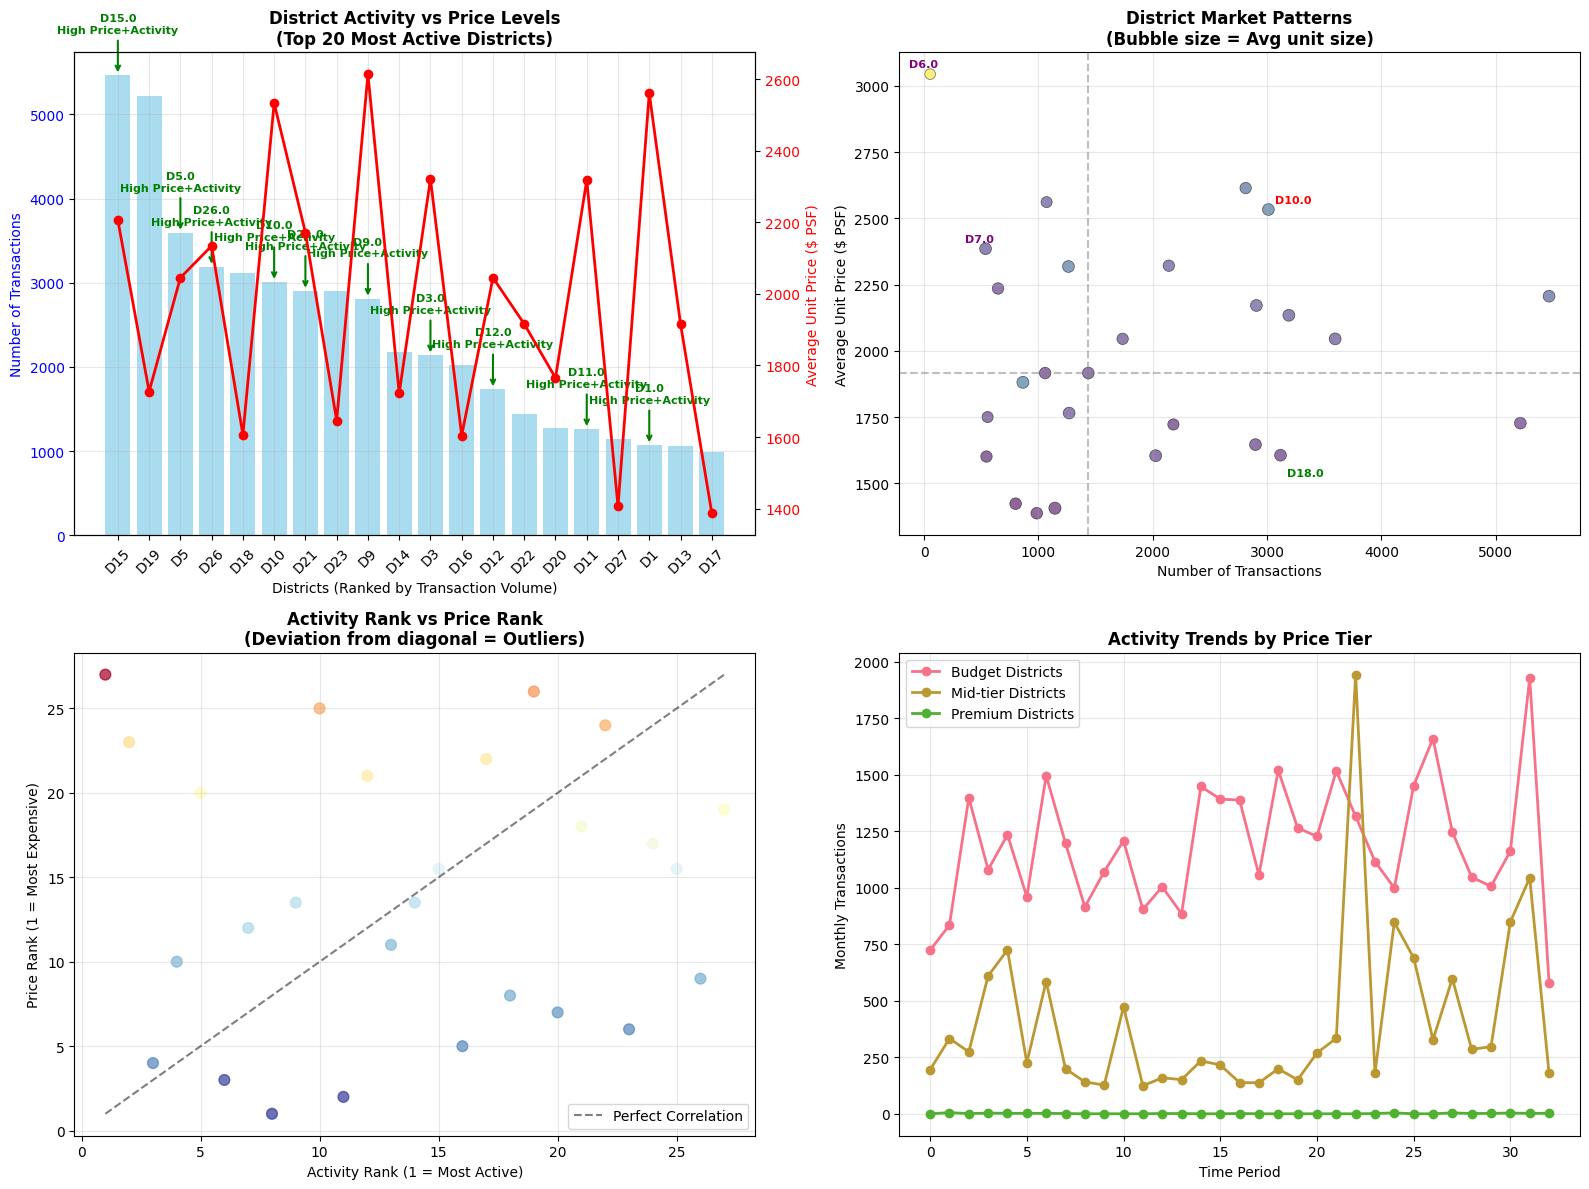


🔍 INTERESTING PATTERNS DISCOVERED:

📊 HIGH PRICE + HIGH ACTIVITY OUTLIERS:
• D10.0: 3011.0 transactions, $2,533 PSF
  → Expensive but liquid market - premium with demand

💰 VALUE DISTRICTS (High Activity + Low Price):
• D18.0: 3117.0 transactions, $1,606 PSF
  → High liquidity, affordable entry point

💎 EXCLUSIVE DISTRICTS (Low Activity + High Price):
• D6.0: 52.0 transactions, $3,044 PSF
  → Exclusive/illiquid premium market
• D7.0: 537.0 transactions, $2,385 PSF
  → Exclusive/illiquid premium market

📈 MARKET STRUCTURE INSIGHTS:
• Activity-Price Correlation: 0.000
  → Higher prices tend to have MORE activity (counterintuitive!)

• Most Active District: D15 (5466 transactions)
• Most Expensive District: D6 ($3,044 PSF)

🎯 EXPLORATION QUESTIONS FOR FURTHER ANALYSIS:
• Why do some expensive districts maintain high activity?
• Are value districts sustainable for long-term growth?
• What drives liquidity in premium markets?
• Do exclusive districts represent better investment potential?


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("Exploring District Price vs Activity Relationship...")

# Prepare district-level data
district_analysis = combined_df.groupby('Postal District').agg({
    'Unit Price ($ PSF)': 'mean',
    'Transacted Price ($)': ['count', 'median'],
    'Area (SQFT)': 'mean'
}).round(0)

district_analysis.columns = ['Avg_PSF', 'Transaction_Count', 'Median_Price', 'Avg_Size']
district_analysis = district_analysis.reset_index()

# Create exploration charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. MAIN EXPLORATION: Price vs Activity with Dual Axis
ax1_twin = ax1.twinx()

# Sort by transaction count for better visualization
district_sorted = district_analysis.sort_values('Transaction_Count', ascending=False)
top_20_districts = district_sorted.head(20)

x_pos = range(len(top_20_districts))
district_labels = [f'D{d}' for d in top_20_districts['Postal District']]

# Bar chart for transaction count (left axis)
bars1 = ax1.bar(x_pos, top_20_districts['Transaction_Count'], 
                alpha=0.7, color='skyblue', label='Transaction Count')
ax1.set_ylabel('Number of Transactions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for price (right axis)
line1 = ax1_twin.plot(x_pos, top_20_districts['Avg_PSF'], 
                      color='red', marker='o', linewidth=2, markersize=6, 
                      label='Avg PSF')
ax1_twin.set_ylabel('Average Unit Price ($ PSF)', color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')

ax1.set_xlabel('Districts (Ranked by Transaction Volume)')
ax1.set_title('District Activity vs Price Levels\n(Top 20 Most Active Districts)', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(district_labels, rotation=45)

# Add annotations for interesting outliers
for i, (idx, row) in enumerate(top_20_districts.iterrows()):
    district = row['Postal District']
    # Highlight districts with high price but still high activity (potential outliers)
    if row['Avg_PSF'] > 2000 and row['Transaction_Count'] > 1000:
        ax1.annotate(f'D{district}\nHigh Price+Activity', 
                    xy=(i, row['Transaction_Count']), 
                    xytext=(i, row['Transaction_Count'] + 500),
                    arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
                    fontsize=8, ha='center', color='green', weight='bold')

ax1.grid(True, alpha=0.3)

# 2. SCATTER PLOT: Activity vs Price (All Districts)
ax2.scatter(district_analysis['Transaction_Count'], district_analysis['Avg_PSF'], 
           s=district_analysis['Avg_Size']/10, alpha=0.6, 
           c=district_analysis['Median_Price'], cmap='viridis', edgecolors='black', linewidth=0.5)

# Identify and label outliers
# High activity + High price outliers
high_activity_threshold = district_analysis['Transaction_Count'].quantile(0.75)
high_price_threshold = district_analysis['Avg_PSF'].quantile(0.75)

outliers_high_both = district_analysis[
    (district_analysis['Transaction_Count'] > high_activity_threshold) & 
    (district_analysis['Avg_PSF'] > high_price_threshold)
]

# High activity + Low price (value districts)
low_price_threshold = district_analysis['Avg_PSF'].quantile(0.25)
value_districts = district_analysis[
    (district_analysis['Transaction_Count'] > high_activity_threshold) & 
    (district_analysis['Avg_PSF'] < low_price_threshold)
]

# Low activity + High price (exclusive districts)
low_activity_threshold = district_analysis['Transaction_Count'].quantile(0.25)
exclusive_districts = district_analysis[
    (district_analysis['Transaction_Count'] < low_activity_threshold) & 
    (district_analysis['Avg_PSF'] > high_price_threshold)
]

# Label the outliers
for _, district in outliers_high_both.iterrows():
    ax2.annotate(f'D{district["Postal District"]}', 
                (district['Transaction_Count'], district['Avg_PSF']),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, color='red', weight='bold')

for _, district in value_districts.iterrows():
    ax2.annotate(f'D{district["Postal District"]}', 
                (district['Transaction_Count'], district['Avg_PSF']),
                xytext=(5, -15), textcoords='offset points', 
                fontsize=8, color='green', weight='bold')

for _, district in exclusive_districts.iterrows():
    ax2.annotate(f'D{district["Postal District"]}', 
                (district['Transaction_Count'], district['Avg_PSF']),
                xytext=(-15, 5), textcoords='offset points', 
                fontsize=8, color='purple', weight='bold')

ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('Average Unit Price ($ PSF)')
ax2.set_title('District Market Patterns\n(Bubble size = Avg unit size)', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add quadrant lines
ax2.axhline(y=district_analysis['Avg_PSF'].median(), color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=district_analysis['Transaction_Count'].median(), color='gray', linestyle='--', alpha=0.5)

# 3. ACTIVITY RANKING vs PRICE RANKING
ax3.scatter(district_analysis['Transaction_Count'].rank(), 
           district_analysis['Avg_PSF'].rank(),
           s=60, alpha=0.7, c=district_analysis['Avg_PSF'], cmap='RdYlBu_r')

# Add diagonal line (perfect correlation)
max_rank = max(len(district_analysis), len(district_analysis))
ax3.plot([1, max_rank], [1, max_rank], 'k--', alpha=0.5, label='Perfect Correlation')

ax3.set_xlabel('Activity Rank (1 = Most Active)')
ax3.set_ylabel('Price Rank (1 = Most Expensive)')
ax3.set_title('Activity Rank vs Price Rank\n(Deviation from diagonal = Outliers)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. TEMPORAL ACTIVITY PATTERNS (if data available)
ax4.axis('off')
if combined_df['Sale Date'].notna().sum() > 0:
    # Show activity levels over time for different price tiers
    district_analysis['Price_Tier'] = pd.cut(district_analysis['Avg_PSF'], 
                                           bins=3, labels=['Budget', 'Mid-tier', 'Premium'])
    
    # Get monthly activity by price tier
    monthly_activity = combined_df.groupby([
        combined_df['Sale Date'].dt.to_period('M'),
        pd.cut(combined_df['Unit Price ($ PSF)'], bins=3, labels=['Budget', 'Mid-tier', 'Premium'])
    ]).size().reset_index()
    monthly_activity.columns = ['Month', 'Price_Tier', 'Transaction_Count']
    
    # Plot on ax4 instead
    ax4.axis('on')
    for tier in ['Budget', 'Mid-tier', 'Premium']:
        tier_data = monthly_activity[monthly_activity['Price_Tier'] == tier]
        if len(tier_data) > 0:
            ax4.plot(range(len(tier_data)), tier_data['Transaction_Count'], 
                    marker='o', label=f'{tier} Districts', linewidth=2)
    
    ax4.set_xlabel('Time Period')
    ax4.set_ylabel('Monthly Transactions')
    ax4.set_title('Activity Trends by Price Tier', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print interesting findings
print("\n🔍 INTERESTING PATTERNS DISCOVERED:")

print(f"\n📊 HIGH PRICE + HIGH ACTIVITY OUTLIERS:")
if len(outliers_high_both) > 0:
    for _, district in outliers_high_both.iterrows():
        print(f"• D{district['Postal District']}: {district['Transaction_Count']} transactions, ${district['Avg_PSF']:,.0f} PSF")
        print(f"  → Expensive but liquid market - premium with demand")

print(f"\n💰 VALUE DISTRICTS (High Activity + Low Price):")
if len(value_districts) > 0:
    for _, district in value_districts.iterrows():
        print(f"• D{district['Postal District']}: {district['Transaction_Count']} transactions, ${district['Avg_PSF']:,.0f} PSF")
        print(f"  → High liquidity, affordable entry point")

print(f"\n💎 EXCLUSIVE DISTRICTS (Low Activity + High Price):")
if len(exclusive_districts) > 0:
    for _, district in exclusive_districts.iterrows():
        print(f"• D{district['Postal District']}: {district['Transaction_Count']} transactions, ${district['Avg_PSF']:,.0f} PSF")
        print(f"  → Exclusive/illiquid premium market")

print(f"\n📈 MARKET STRUCTURE INSIGHTS:")
correlation = district_analysis['Transaction_Count'].corr(district_analysis['Avg_PSF'])
print(f"• Activity-Price Correlation: {correlation:.3f}")
if correlation > 0:
    print("  → Higher prices tend to have MORE activity (counterintuitive!)")
elif correlation < -0.3:
    print("  → Higher prices tend to have LESS activity (expected)")
else:
    print("  → No clear relationship between price and activity")

print(f"\n• Most Active District: D{district_analysis.loc[district_analysis['Transaction_Count'].idxmax(), 'Postal District']} ({district_analysis['Transaction_Count'].max()} transactions)")
print(f"• Most Expensive District: D{district_analysis.loc[district_analysis['Avg_PSF'].idxmax(), 'Postal District']} (${district_analysis['Avg_PSF'].max():,.0f} PSF)")

print(f"\n🎯 EXPLORATION QUESTIONS FOR FURTHER ANALYSIS:")
print("• Why do some expensive districts maintain high activity?")
print("• Are value districts sustainable for long-term growth?") 
print("• What drives liquidity in premium markets?")
print("• Do exclusive districts represent better investment potential?")

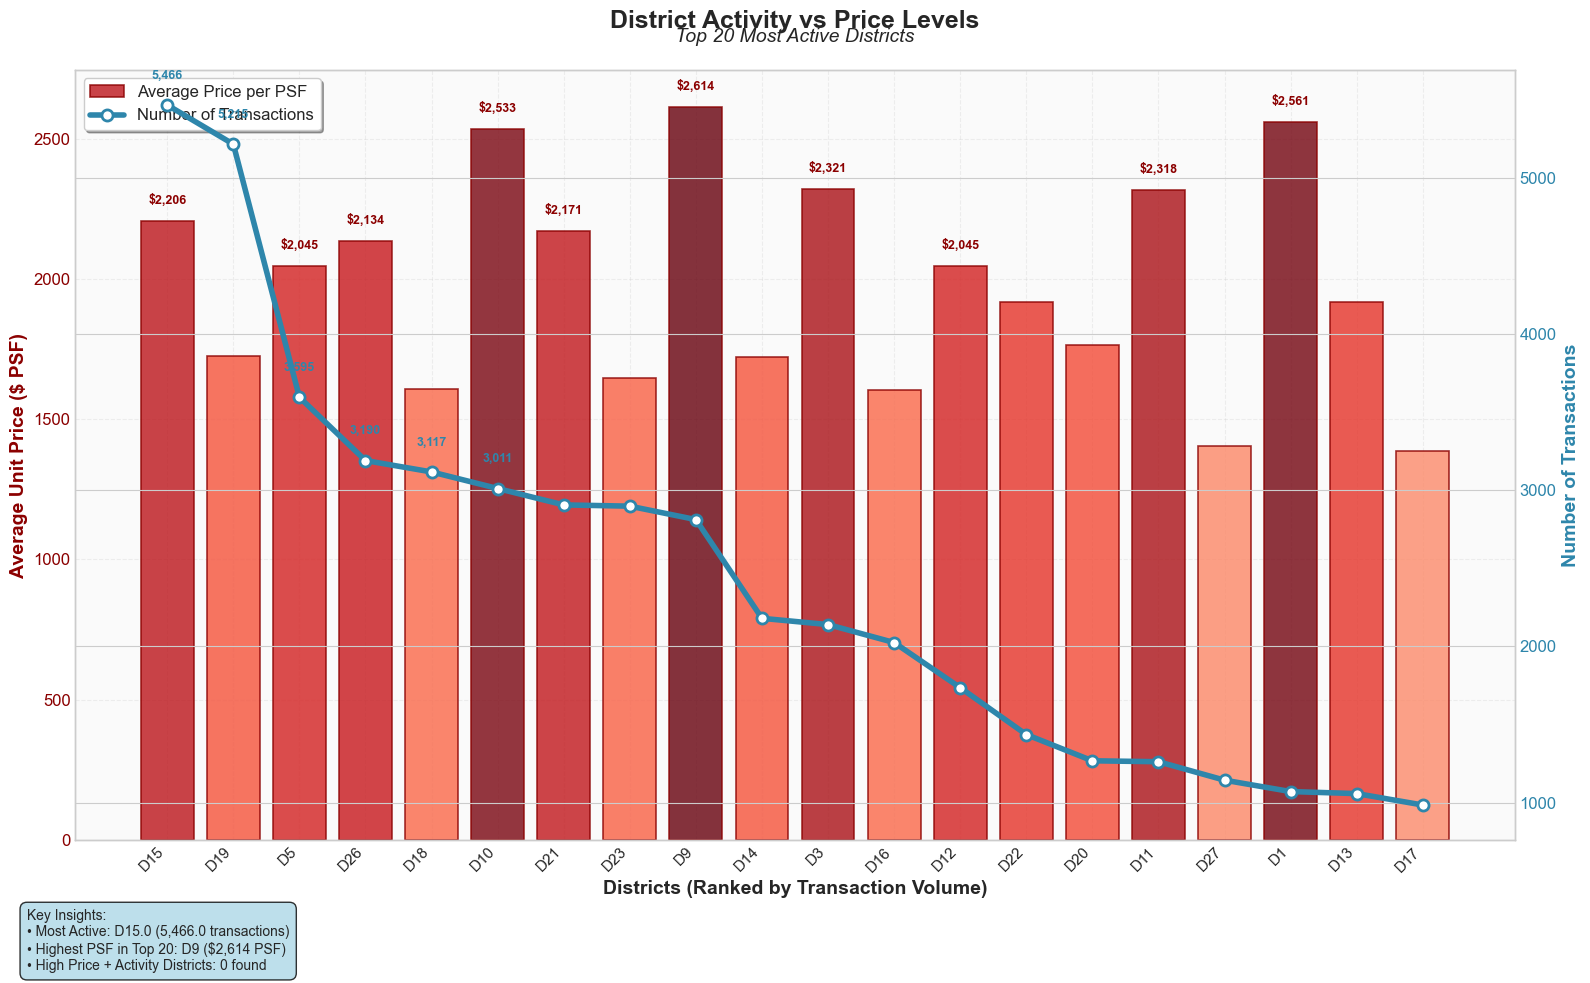

✨ Enhanced visualization completed!

📊 Chart shows:
• Bar heights = Average price per square foot (color-coded by price level)
• Blue line = Number of transactions (market activity)
• X-axis = Districts ranked by transaction volume (most active first)

🎯 Notable patterns:
• Districts with both high prices AND high activity are marked in green
• Color gradient shows price tiers across active districts
• Line trend reveals activity patterns vs price levels


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style for prettier plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Prepare district-level data
district_analysis = combined_df.groupby('Postal District').agg({
    'Unit Price ($ PSF)': 'mean',
    'Transacted Price ($)': 'count',
    'Area (SQFT)': 'mean'
}).round(0)

district_analysis.columns = ['Avg_PSF', 'Transaction_Count', 'Avg_Size']
district_analysis = district_analysis.reset_index()

# Sort by transaction count and get top 20
district_sorted = district_analysis.sort_values('Transaction_Count', ascending=False)
top_20_districts = district_sorted.head(20)

# Create the enhanced visualization
fig, ax1 = plt.subplots(figsize=(16, 10))

# Set up positions and labels
x_pos = np.arange(len(top_20_districts))
district_labels = [f'D{d}' for d in top_20_districts['Postal District']]

# Create color gradient for price bars (red gradient from light to dark)
price_normalized = (top_20_districts['Avg_PSF'] - top_20_districts['Avg_PSF'].min()) / \
                   (top_20_districts['Avg_PSF'].max() - top_20_districts['Avg_PSF'].min())
colors = plt.cm.Reds(0.4 + 0.6 * price_normalized)  # Range from light red to dark red

# Bar chart for PRICE (left axis)
bars = ax1.bar(x_pos, top_20_districts['Avg_PSF'], 
               color=colors, alpha=0.8, edgecolor='darkred', linewidth=1.2,
               label='Average Price per PSF')

ax1.set_ylabel('Average Unit Price ($ PSF)', fontsize=14, color='darkred', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='darkred', labelsize=12)
ax1.yaxis.label.set_color('darkred')

# Second y-axis for TRANSACTION COUNT (line)
ax2 = ax1.twinx()
line = ax2.plot(x_pos, top_20_districts['Transaction_Count'], 
                color='#2E86AB', marker='o', linewidth=4, markersize=8, 
                markerfacecolor='white', markeredgecolor='#2E86AB', markeredgewidth=2,
                label='Number of Transactions')

ax2.set_ylabel('Number of Transactions', fontsize=14, color='#2E86AB', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#2E86AB', labelsize=12)

# Customize x-axis
ax1.set_xlabel('Districts (Ranked by Transaction Volume)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(district_labels, rotation=45, ha='right', fontsize=11)

# Add title with better formatting
plt.suptitle('District Activity vs Price Levels', fontsize=18, fontweight='bold', y=0.98)
plt.title('Top 20 Most Active Districts', fontsize=14, style='italic', pad=20)

# Add value labels on bars (price)
for i, (bar, price) in enumerate(zip(bars, top_20_districts['Avg_PSF'])):
    if price > 2000:  # Only label high-value districts to avoid clutter
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'${price:,.0f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', color='darkred')

# Add value labels on line points (transaction count)
for i, (x, count) in enumerate(zip(x_pos, top_20_districts['Transaction_Count'])):
    if count > 3000:  # Only label high-activity districts
        ax2.text(x, count + 150, f'{count:,}', ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='#2E86AB')

# Identify and highlight interesting outliers
high_price_threshold = top_20_districts['Avg_PSF'].quantile(0.75)
high_activity_threshold = top_20_districts['Transaction_Count'].quantile(0.75)

# High price + High activity outliers
outliers = top_20_districts[
    (top_20_districts['Avg_PSF'] > high_price_threshold) & 
    (top_20_districts['Transaction_Count'] > high_activity_threshold)
]

# Add annotations for outliers
for i, (idx, district) in enumerate(zip(top_20_districts.index, top_20_districts['Postal District'])):
    if district in outliers['Postal District'].values:
        ax1.annotate(f'D{district}\nHigh Price + Activity', 
                    xy=(i, top_20_districts.iloc[i]['Avg_PSF']), 
                    xytext=(i, top_20_districts.iloc[i]['Avg_PSF'] + 400),
                    arrowprops=dict(arrowstyle='->', color='green', lw=2),
                    fontsize=10, ha='center', color='green', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', 
          fontsize=12, frameon=True, fancybox=True, shadow=True)

# Improve grid
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Add background color for better contrast
fig.patch.set_facecolor('white')
ax1.set_facecolor('#fafafa')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.15)

# Add summary statistics text box
stats_text = f"""Key Insights:
• Most Active: D{top_20_districts.iloc[0]['Postal District']} ({top_20_districts.iloc[0]['Transaction_Count']:,} transactions)
• Highest PSF in Top 20: D{top_20_districts.loc[top_20_districts['Avg_PSF'].idxmax(), 'Postal District']} (${top_20_districts['Avg_PSF'].max():,.0f} PSF)
• High Price + Activity Districts: {len(outliers)} found"""

plt.figtext(0.02, 0.02, stats_text, fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8))

plt.show()

print("✨ Enhanced visualization completed!")
print(f"\n📊 Chart shows:")
print(f"• Bar heights = Average price per square foot (color-coded by price level)")
print(f"• Blue line = Number of transactions (market activity)")
print(f"• X-axis = Districts ranked by transaction volume (most active first)")
print(f"\n🎯 Notable patterns:")
print(f"• Districts with both high prices AND high activity are marked in green")
print(f"• Color gradient shows price tiers across active districts")
print(f"• Line trend reveals activity patterns vs price levels")

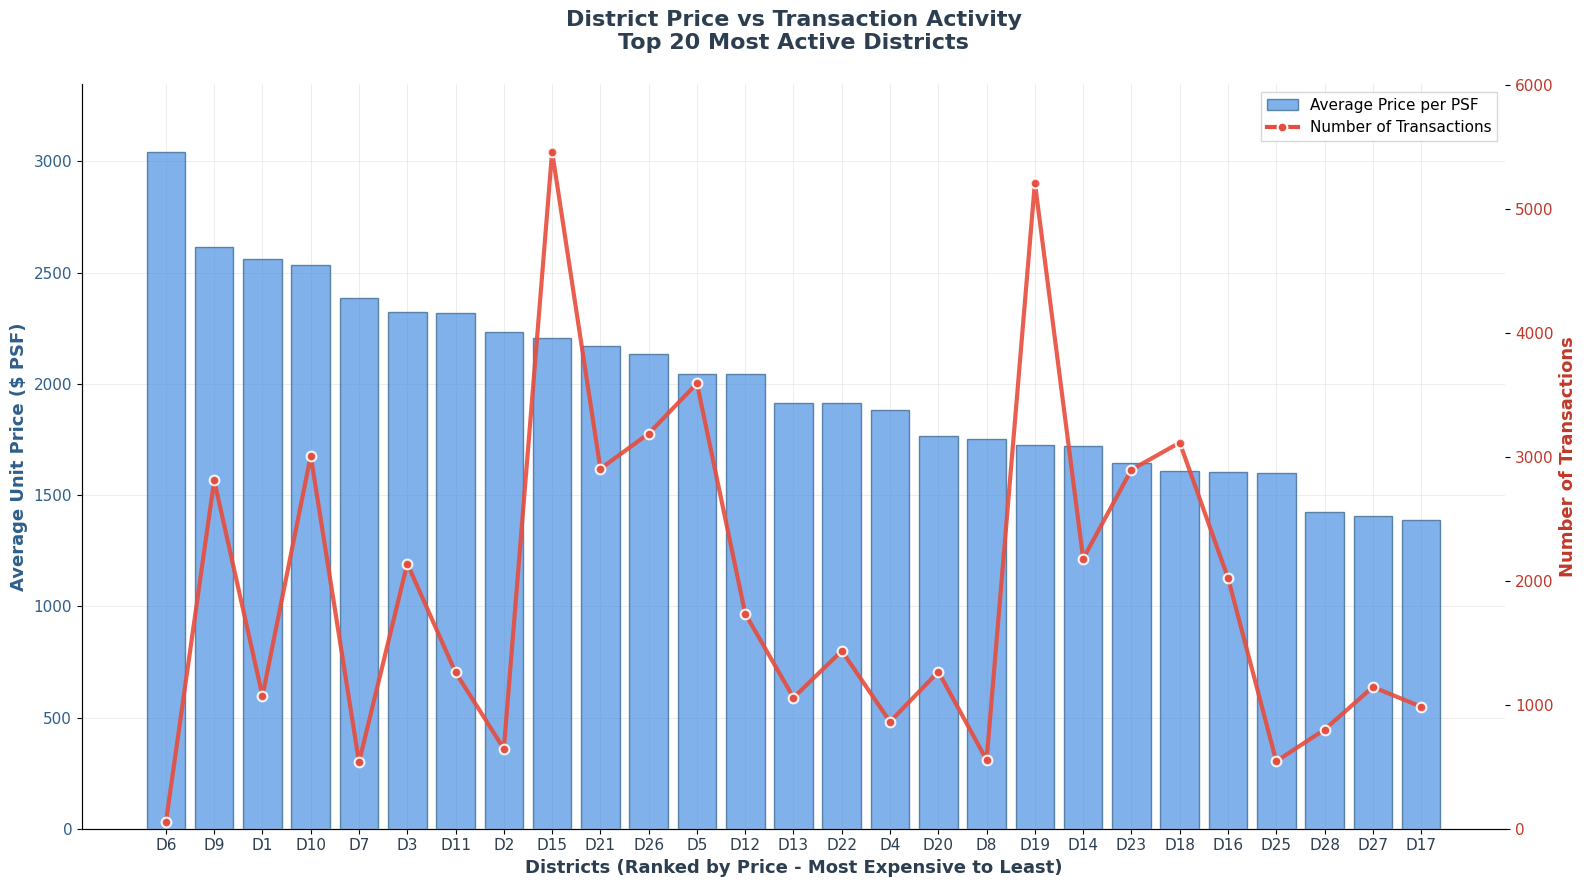

✨ Clean price-ranked visualization completed!

📊 Chart structure:
• X-axis: Districts ranked by price (highest to lowest)
• Blue bars: Average price per square foot
• Red line: Number of transactions

🎯 Key insights visible:
• Most expensive active district: D6.0 ($3,044 PSF)
• Least expensive active district: D17.0 ($1,387 PSF)
• Pattern: Price vs activity relationship across the spectrum


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set clean, minimal style
plt.style.use('default')
plt.rcParams['font.size'] = 11
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Prepare district-level data
district_analysis = combined_df.groupby('Postal District').agg({
    'Unit Price ($ PSF)': 'mean',
    'Transacted Price ($)': 'count',
    'Area (SQFT)': 'mean'
}).round(0)

district_analysis.columns = ['Avg_PSF', 'Transaction_Count', 'Avg_Size']
district_analysis = district_analysis.reset_index()

# Get top 20 most active districts first, then sort by price (descending)
top_active = district_analysis.nlargest(28, 'Transaction_Count')
top_20_districts = top_active.sort_values('Avg_PSF', ascending=False)

# Create the clean visualization
fig, ax1 = plt.subplots(figsize=(16, 9))

# Set up positions and labels
x_pos = np.arange(len(top_20_districts))
district_labels = [f'D{d}' for d in top_20_districts['Postal District']]

# Bar chart for PRICE (primary axis) - Clean blue gradient
bars = ax1.bar(x_pos, top_20_districts['Avg_PSF'], 
               color='#4A90E2', alpha=0.7, edgecolor='#2E5F8A', linewidth=1,
               width=0.8)

ax1.set_ylabel('Average Unit Price ($ PSF)', fontsize=13, fontweight='600', color='#2E5F8A')
ax1.tick_params(axis='y', labelcolor='#2E5F8A', labelsize=11)

# Second y-axis for TRANSACTION COUNT (line)
ax2 = ax1.twinx()
line = ax2.plot(x_pos, top_20_districts['Transaction_Count'], 
                color='#E74C3C', marker='o', linewidth=3, markersize=7, 
                markerfacecolor='#E74C3C', markeredgecolor='white', markeredgewidth=1.5,
                alpha=0.9)

ax2.set_ylabel('Number of Transactions', fontsize=13, fontweight='600', color='#C0392B')
ax2.tick_params(axis='y', labelcolor='#C0392B', labelsize=11)

# Customize x-axis
ax1.set_xlabel('Districts (Ranked by Price - Most Expensive to Least)', 
               fontsize=13, fontweight='600', color='#2C3E50')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(district_labels, fontsize=11, color='#2C3E50')

# Clean title
ax1.set_title('District Price vs Transaction Activity\nTop 20 Most Active Districts', 
              fontsize=16, fontweight='700', color='#2C3E50', pad=25)

# Add subtle grid for readability
ax1.grid(True, alpha=0.2, linestyle='-', linewidth=0.5, color='gray')
ax1.set_axisbelow(True)

# Create clean legend
from matplotlib.lines import Line2D
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='#4A90E2', alpha=0.7, edgecolor='#2E5F8A', 
                  label='Average Price per PSF'),
    Line2D([0], [0], color='#E74C3C', linewidth=3, marker='o', markersize=7,
           markerfacecolor='#E74C3C', markeredgecolor='white', markeredgewidth=1.5,
           label='Number of Transactions')
]

ax1.legend(handles=legend_elements, loc='upper right', fontsize=11, 
          frameon=True, fancybox=False, shadow=False, 
          framealpha=0.9, edgecolor='lightgray')

# Set clean background
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Adjust y-axis limits for better visualization
ax1.set_ylim(0, max(top_20_districts['Avg_PSF']) * 1.1)
ax2.set_ylim(0, max(top_20_districts['Transaction_Count']) * 1.1)

# Clean up layout
plt.tight_layout()

# Add a subtle border around the plot
for spine in ax1.spines.values():
    spine.set_color('#CCCCCC')
    spine.set_linewidth(1)

plt.show()

print("✨ Clean price-ranked visualization completed!")
print(f"\n📊 Chart structure:")
print(f"• X-axis: Districts ranked by price (highest to lowest)")
print(f"• Blue bars: Average price per square foot")
print(f"• Red line: Number of transactions")
print(f"\n🎯 Key insights visible:")
print(f"• Most expensive active district: D{top_20_districts.iloc[0]['Postal District']} (${top_20_districts.iloc[0]['Avg_PSF']:,.0f} PSF)")
print(f"• Least expensive active district: D{top_20_districts.iloc[-1]['Postal District']} (${top_20_districts.iloc[-1]['Avg_PSF']:,.0f} PSF)")
print(f"• Pattern: Price vs activity relationship across the spectrum")